In [ ]:
!pip3 install numpy Pillow

In [1]:
import numpy as np
import random
from PIL import Image, ImageDraw
from copy import deepcopy

In [2]:
def generate_random_num(distribution="uniform"):
    if distribution == "uniform":
        return random.randint(0, 2 ** 32 - 1)
    else:
        return int(np.clip(random.normalvariate(2 ** 16, 2 ** 16), 0, 2 ** 32 - 1))

In [3]:
def concat_num_parts(upper, lower):
    return upper * (2 ** 32) + lower

In [4]:
def rotate(angle, pt):
    return np.array([
        [np.sin(angle), np.cos(angle)],
        [-np.cos(angle), np.sin(angle)]
    ]) @ np.array([[pt[0]], [pt[1]]]).flatten()

In [18]:
def draw_random_triangles(tr_hash, triangles_points):
    im = Image.new('RGB', (400, 400))
    draw = ImageDraw.Draw(im)

    start_color = [1, 1, 1]
    color_steps = [((tr_hash & sum(2 ** k for k in range(start, start + 8))) >> start) for start in range(0, 17, 8)]
    if color_steps[0] == 0:
        for i in range(3):
            color_steps[i] = 5
            start_color[i] = 50
    amount_of_triangles = 0
    for j, triangle in enumerate(triangles_points):
        if tr_hash & 2 ** (j + 8) == 0:
            continue
        new_triangles = triangle
        amount_of_triangles += 1
        for i in range(3):
            new_triangles[i][0] += 200
            new_triangles[i][1] = 200 - new_triangles[i][1]
        a, b, c = new_triangles
        draw.polygon([(a[0], a[1]), (b[0], b[1]), (c[0], c[1])], outline=(start_color[0], start_color[1], start_color[2]))
        for i in range(3):
            start_color[i] += color_steps[i]
            start_color[i] = np.clip(int(start_color[i]), 0, 255)
            start_color[i] = int(start_color[i])
    for y in range(400):
        for x in range(400):
            if im.getpixel((x, y)) == (0, 0, 0):
                im.putpixel((x, y), value=tuple(150 - int(amount_of_triangles * (150 / 40)) for _ in range(3)))
    return im

In [6]:
triangle_angle_range = list(np.linspace(0, 360, 40))
radiuses = list(np.linspace(100, 200, 40))
triangles_points = [(rotate(angle, (0, r)), rotate(angle, (-r * np.sqrt(3) / 2, -r / 2)), rotate(angle, (r * np.sqrt(3) / 2, -r / 2))) for angle, r in zip(triangle_angle_range,
                                                                                                                                                           radiuses)]

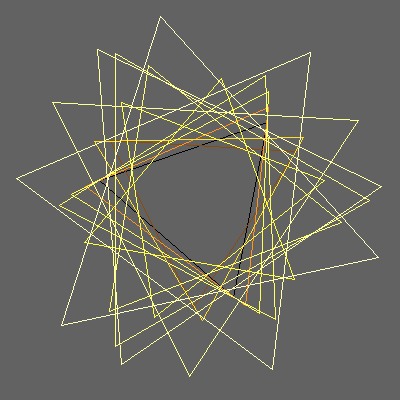

In [38]:
draw_random_triangles(concat_num_parts(generate_random_num(), generate_random_num()), deepcopy(triangles_points))